# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 625
['jamestown', 'grytviken', 'oranjemund', 'ribeira grande', 'taro', 'taiohae', 'jijiga', 'chinde', 'port-aux-francais', 'san antonio de pale', 'lazaro cardenas', 'margate', 'nouadhibou', 'nuuk', 'constantia', 'urangan', 'bethel', 'remire-montjoly', 'nelson', 'monteros', 'edinburgh of the seven seas', 'hofheim in unterfranken', 'stanley', 'badger', 'qarazhal', 'iqaluit', 'baskale', 'puerto natales', 'lebu', 'christchurch', 'invercargill', 'adamstown', 'bardai', 'westport', 'afaahiti', 'brasileia', 'zara', 'peace river', 'vorkuta', 'mata-utu', 'udachny', 'greenville', 'namibe', 'parauapebas', 'la ferte-sous-jouarre', 'cottage grove', 'georgetown', 'celestun', 'utrik', "tot'ma", 'puerto ayora', 'east london', 'argo', 'isafjordur', 'hithadhoo', 'kodiak', 'whangarei', 'hauterive', 'bilibino', 'necochea', 'sitka', 'toma', 'ushuaia', 'nemuro', 'klyuchi', 'anadyr', 'bamboo flat', 'pisco', 'dauphin', 'waitangi', 'newport', 'blankenburg', 'murakami', 'rabaul', 't

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown


Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | oranjemund
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | taro
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | jijiga
Processing Record 8 of Set 1 | chinde
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | lazaro cardenas
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | nuuk
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | urangan
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | remire-montjoly
Processing Record 19 of Set 1 | nelson
Processing Record 20 of Set 1 | monteros
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | hofheim in unterfranken
Processing Record 23 of Set 1 | stanley
Processing Record

In [6]:
city_url

'https://api.openweathermap.org/data/2.5/weather?q=kurkino&units=metric&appid=8b592e20329b6021cb9a18ef2714f58a'

In [7]:
city_weather

{'coord': {'lon': 38.6582, 'lat': 53.4257},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 12.02,
  'feels_like': 11.18,
  'temp_min': 12.02,
  'temp_max': 12.02,
  'pressure': 1028,
  'humidity': 73,
  'sea_level': 1028,
  'grnd_level': 1003},
 'visibility': 10000,
 'wind': {'speed': 4.17, 'deg': 260, 'gust': 10.41},
 'clouds': {'all': 24},
 'dt': 1714509196,
 'sys': {'country': 'RU', 'sunrise': 1714441941, 'sunset': 1714495954},
 'timezone': 10800,
 'id': 538733,
 'name': 'Kurkino',
 'cod': 200}

In [8]:
city_data

[{'City': 'jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 17.8,
  'Humidity': 77,
  'Cloudiness': 100,
  'Wind Speed': 4.12,
  'Country': 'US',
  'Date': 1714508747},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': -0.75,
  'Humidity': 71,
  'Cloudiness': 22,
  'Wind Speed': 2.96,
  'Country': 'GS',
  'Date': 1714508933},
 {'City': 'oranjemund',
  'Lat': -28.55,
  'Lng': 16.4333,
  'Max Temp': 16.96,
  'Humidity': 80,
  'Cloudiness': 0,
  'Wind Speed': 0.79,
  'Country': 'NA',
  'Date': 1714508459},
 {'City': 'ribeira grande',
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 18.22,
  'Humidity': 72,
  'Cloudiness': 20,
  'Wind Speed': 2.57,
  'Country': 'PT',
  'Date': 1714508934},
 {'City': 'taro',
  'Lat': -8.3862,
  'Lng': 115.28,
  'Max Temp': 23,
  'Humidity': 100,
  'Cloudiness': 96,
  'Wind Speed': 0.47,
  'Country': 'ID',
  'Date': 1714508975},
 {'City': 'jijiga',
  'Lat': 9.35,
  'Lng': 42.8,
  'Max Temp': 22.39,
  'Humidity': 67,
  'Cl

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,17.80,77,100,4.12,US,1714508747
1,grytviken,-54.2811,-36.5092,-0.75,71,22,2.96,GS,1714508933
2,oranjemund,-28.5500,16.4333,16.96,80,0,0.79,NA,1714508459
3,ribeira grande,38.5167,-28.7000,18.22,72,20,2.57,PT,1714508934
4,taro,-8.3862,115.2800,23.00,100,96,0.47,ID,1714508975


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,17.80,77,100,4.12,US,1714508747
1,grytviken,-54.2811,-36.5092,-0.75,71,22,2.96,GS,1714508933
2,oranjemund,-28.5500,16.4333,16.96,80,0,0.79,NaN,1714508459
3,ribeira grande,38.5167,-28.7000,18.22,72,20,2.57,PT,1714508934
4,taro,-8.3862,115.2800,23.00,100,96,0.47,ID,1714508975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

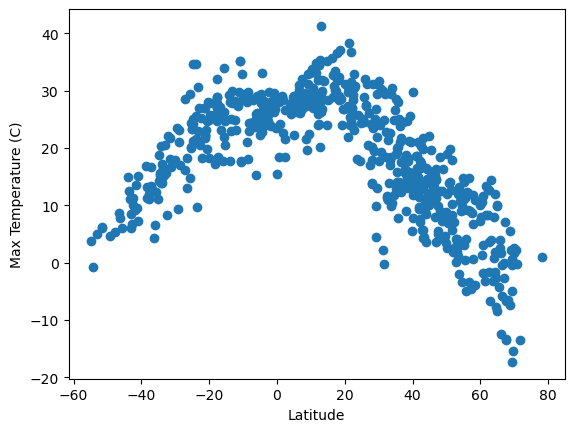

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

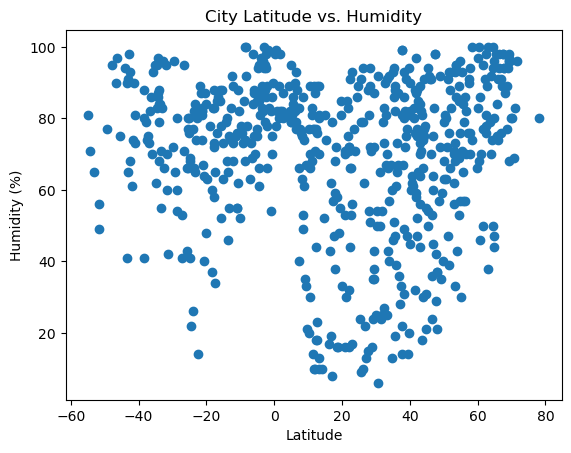

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

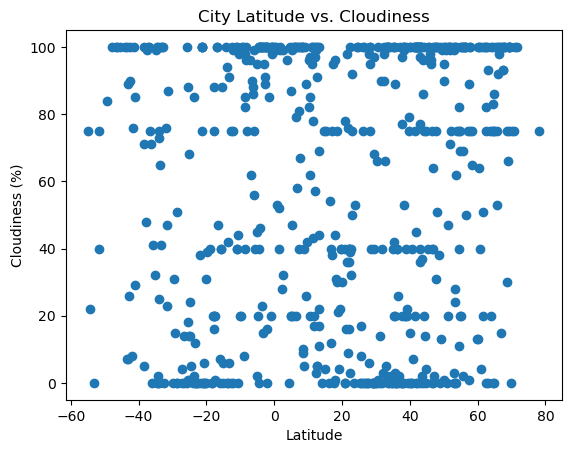

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

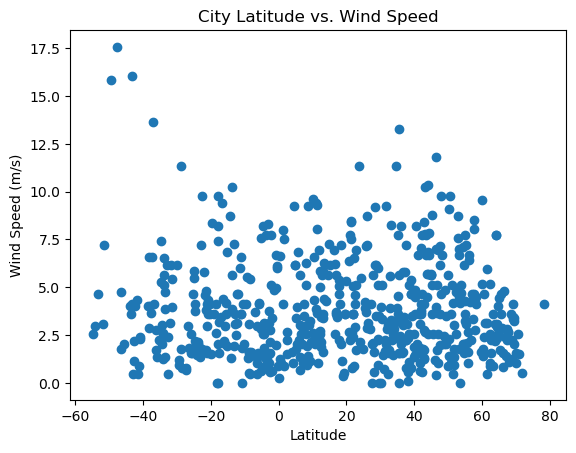

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,17.80,77,100,4.12,US,1714508747
3,ribeira grande,38.5167,-28.7000,18.22,72,20,2.57,PT,1714508934
5,jijiga,9.3500,42.8000,22.39,67,89,3.25,ET,1714508976
6,chinde,26.8418,88.0763,20.53,22,0,2.83,NP,1714508976
9,lazaro cardenas,17.9583,-102.2000,28.78,59,96,5.07,MX,1714508482


In [18]:
# Define a function to create Linear Regression plots
latitudes_no = northern_hemi_df["Lat"]
max_temps_no = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_no,max_temps_no)

regression_line_no = slope * latitudes_no + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

r_no = rvalue**2


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-0.75,71,22,2.96,GS,1714508933
2,oranjemund,-28.5500,16.4333,16.96,80,0,0.79,NaN,1714508459
4,taro,-8.3862,115.2800,23.00,100,96,0.47,ID,1714508975
7,port-aux-francais,-49.3500,70.2167,4.64,77,84,15.86,TF,1714508922
8,san antonio de pale,-1.4014,5.6325,28.24,83,85,4.87,GQ,1714508977


In [20]:
# Define a function to create Linear Regression plots
latitudes_so = southern_hemi_df["Lat"]
max_temps_so = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_so,max_temps_so)

regression_line_so = slope * latitudes_so + intercept

r_so = rvalue**2

line_eq_so = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

###  Temperature vs. Latitude Linear Regression Plot

r = 0.7072483902046584


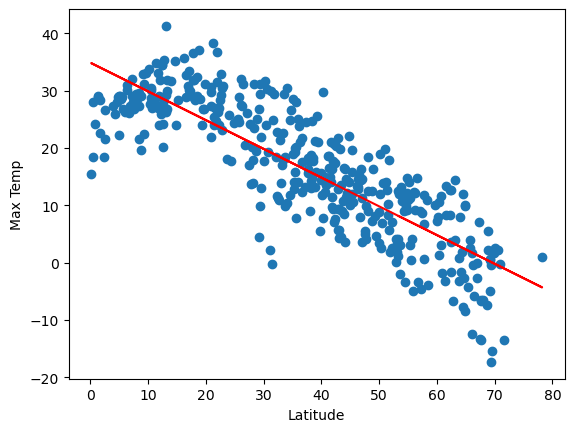

In [21]:
# Linear regression on Northern Hemisphere
print(f'r = {r_no}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(latitudes_no,regression_line_no, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

plt.show()




r = 0.6371869593490301


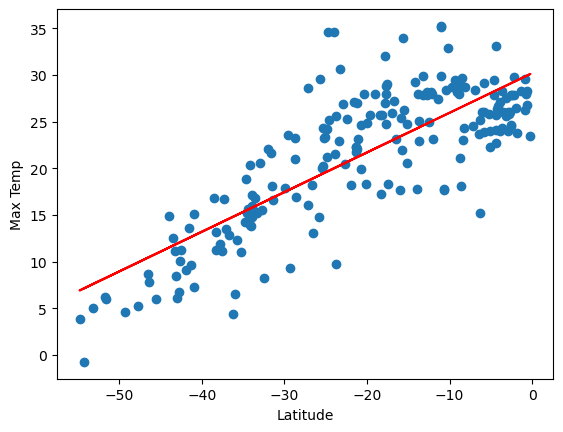

In [22]:
# Linear regression on Southern Hemisphere

print(f'r = {r_so}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(latitudes_so,regression_line_so, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq_so,(-25,275),fontsize=15,color="red")

plt.show()


**Discussion about the linear relationship:  The closest the latitude is to 0, the higher the maximum temperatures are. This means the closest the city is to the equator, the hotter it gets.**

### Humidity vs. Latitude Linear Regression Plot

r = 0.04607644408423306


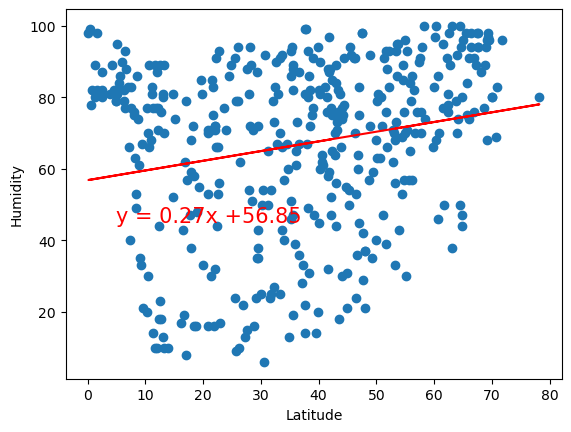

In [23]:
# Northern Hemisphere

latitudes_no = northern_hemi_df["Lat"]
humidity_no = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_no,humidity_no)

regression_line_no = slope * latitudes_no + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

r_no = rvalue**2



print(f'r = {r_no}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(latitudes_no,regression_line_no, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

plt.show()


r = 0.01756432872751489


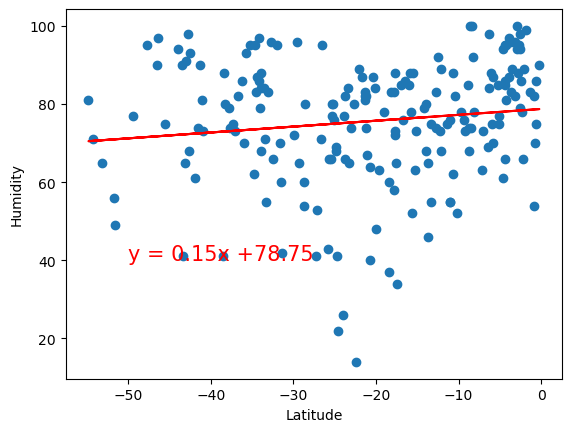

In [24]:
# Southern Hemisphere

latitudes_so = southern_hemi_df["Lat"]
humidity_so = southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_so,humidity_so)

regression_line_so = slope * latitudes_so + intercept

r_so = rvalue**2

line_eq_so = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



print(f'r = {r_so}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(latitudes_so,regression_line_so, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq_so,(-50,40),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship: The regression line tells us in the first chart, the furthest from the equator the more humid, but the second one tells us the closest to the equator the more humid, but taking a look at the correlation coeficient, it is very low on both cases which tells us theres low/nule correlation between these two indicators**

### Cloudiness vs. Latitude Linear Regression Plot

r = 0.017442855967201916


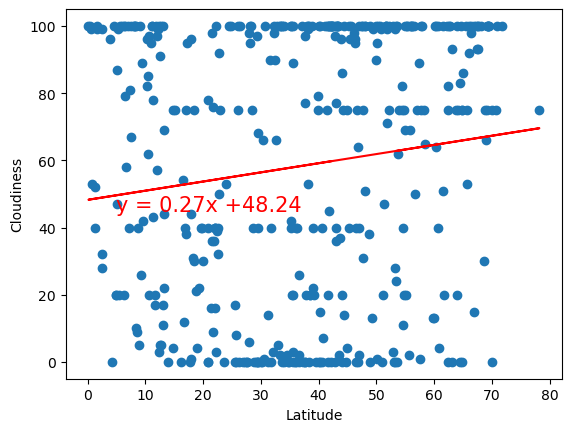

In [25]:
# Northern Hemisphere
latitudes_no = northern_hemi_df["Lat"]
cloudiness_no = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_no,cloudiness_no)

regression_line_no = slope * latitudes_no + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

r_no = rvalue**2



print(f'r = {r_no}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(latitudes_no,regression_line_no, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

plt.show()

r = 0.017816490943106326


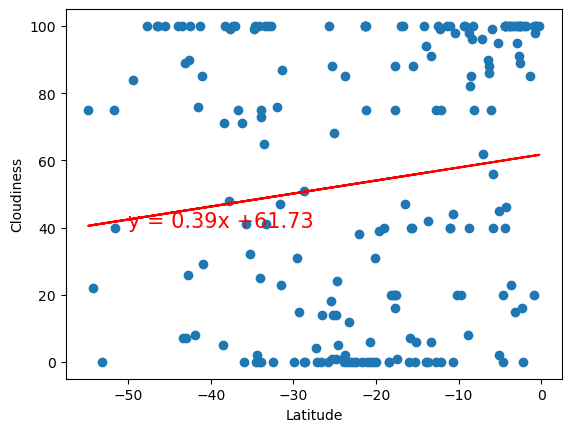

In [26]:
# Southern Hemisphere
latitudes_so = southern_hemi_df["Lat"]
cloudiness_so = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_so,cloudiness_so)

regression_line_so = slope * latitudes_so + intercept

r_so = rvalue**2

line_eq_so = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



print(f'r = {r_so}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(latitudes_so,regression_line_so, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq_so,(-50,40),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship: Same case as before, there is very low correlation between Latitude and Cloudiness** 

### Wind Speed vs. Latitude Linear Regression Plot

r = 0.0036951095370350694


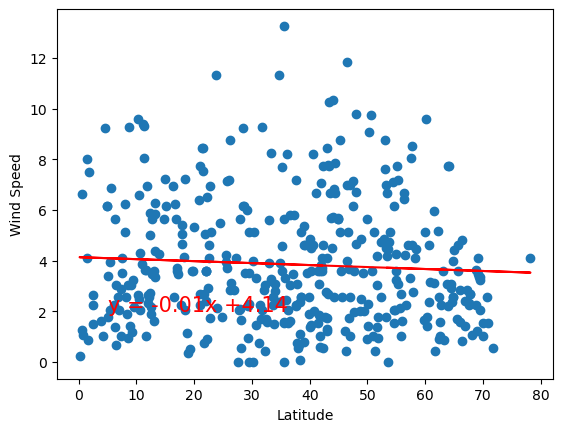

In [27]:
# Northern Hemisphere
latitudes_no = northern_hemi_df["Lat"]
wind_no = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_no,wind_no)

regression_line_no = slope * latitudes_no + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

r_no = rvalue**2



print(f'r = {r_no}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(latitudes_no,regression_line_no, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(5,2),fontsize=15,color="red")

plt.show()

r = 0.027618149974665922


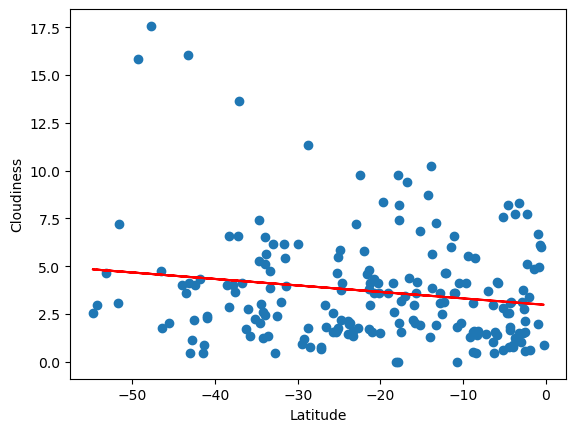

In [28]:
# Southern Hemisphere
latitudes_so = southern_hemi_df["Lat"]
wind_so = southern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(latitudes_so,wind_so)

regression_line_so = slope * latitudes_so + intercept

r_so = rvalue**2

line_eq_so = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



print(f'r = {r_so}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(latitudes_so,regression_line_so, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq_so,(-50,40),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship: Same case as before, there is very low correlation between Latitude and Wind Speed** 